# Let's take a Iris dataset.


Importing required libraries.

In [23]:
import numpy as np
import pandas as pd
import statistics
from scipy.stats import binom
import matplotlib
from matplotlib import pyplot as plt
import pylab
import seaborn as sns

Reading the dataset.

In [24]:
data = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
df = pd.DataFrame(data)

In [25]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dataset discription :
- It is an Iris Plants Database.
- he data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.One class is  linearly separable from the other 2; the latter are NOT linearly separable from each other.
- Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
Some of the characteristics we might want to report are:
• modes: Is there more than one cluster?
 Yes, there are three clusters in the iris dataset. That we can get by using species.
• spread: How much variability is there in the values?
For each variable we have an value of std deviation.
• tails: How quickly do the probabilities drop off as we move away from
the modes?
The part of a distribution at the high and low extremes.
• outliers: Are there extreme values far from the modes?
Yes, There are we can clearly see it in the histogram.

In [8]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


SepalLengthCm has a p-value of 0.056824
SepalWidthCm has a p-value of 0.167241
PetalLengthCm has a p-value of 0.000000 - distribution is not normal
PetalWidthCm has a p-value of 0.000000 - distribution is not normal


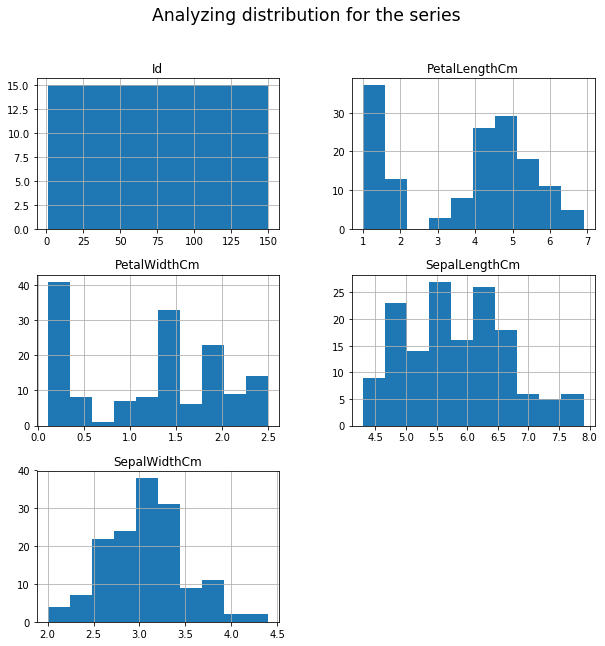

In [26]:
df.hist(
    column=["Id","SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

import scipy.stats as stats

#print("Sepal length variance:\t %f" % np.var(data["SepalLengthCm"]))
#print("Sepal width variance: \t %f" % np.var(data["SepalWidthCm"]))
#print("Petal length variance:\t %f" % np.var(data["PetalLengthCm"]))
#print("Petal width variance: \t %f\n" % np.var(data["PetalWidthCm"]))

for param in ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]:
    z, pval = stats.normaltest(data[param])
    #print(z)
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

1. At first sight, Petal length and petal width seem to diverge from the normal distribution.
2. Petal length histogram is showing a bell shape curve or normal distribution after some initial observation so it can not be said as normal. The initial observation we may consider as outliers.
3. Petal width is showing some discrete plot. The petal width value according to plot is either minimum or maximum.
4. According to Sepal length histogram it seems to be an normal distribution.
5. In Sepal width histogram. It is exactly normal distribution most of the data is deviated towards the 3 cm.


Compare two scenarios in your data using a PMF

# Probablity Mass Function.

In probability and statistics, a probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value.
Thinking of probability as mass helps to avoid mistakes since the physical mass is conserved as is the total probability for all hypothetical outcomes x. Which is equal to one.

In [27]:
df= pd.DataFrame(data["PetalWidthCm"].value_counts())
df
length = len(data["PetalWidthCm"])
length

150

In [28]:
data = pd.DataFrame(df)
data

,PetalWidthCm
0.2,28
1.3,13
1.5,12
1.8,12
1.4,8
2.3,8
1.0,7
0.3,7
0.4,7
0.1,6


In [29]:
data.columns = ["PetalWidthCm"]
data

,PetalWidthCm
0.2,28
1.3,13
1.5,12
1.8,12
1.4,8
2.3,8
1.0,7
0.3,7
0.4,7
0.1,6


In [30]:
data["Prob"] = data["PetalWidthCm"]/lenght
data

,PetalWidthCm,Prob
0.2,28,0.186667
1.3,13,0.086667
1.5,12,0.080000
1.8,12,0.080000
1.4,8,0.053333
2.3,8,0.053333
1.0,7,0.046667
0.3,7,0.046667
0.4,7,0.046667
0.1,6,0.040000


<BarContainer object of 22 artists>

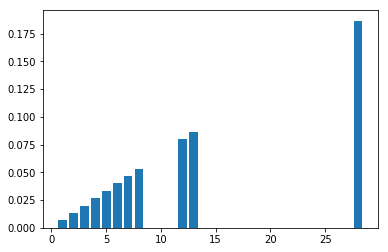

In [31]:
plt.bar(data["PetalWidthCm"],data["Prob"])

For better visualization we can use seaborn library.

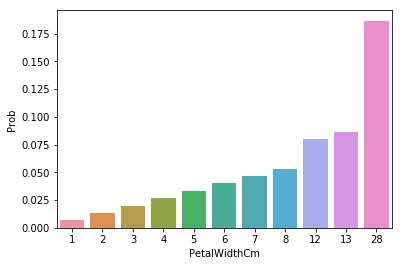

In [32]:
import seaborn as sns
sns.barplot(data["PetalWidthCm"],data["Prob"])

# Cumulative Distribution Function.

- The cumulative distribution function (CDF) of a random variable is another method to describe the distribution of random variables. The advantage of the CDF is that it can be defined for any kind of random variable (discrete, continuous, and mixed).

The cumulative distribution function (CDF) of random variable X is defined as
   FX(x) = P(X≤x), for all x∈R.
   
Note that the subscript X indicates that this is the CDF of the random variable X. Also, note that the CDF is defined for all x∈R.


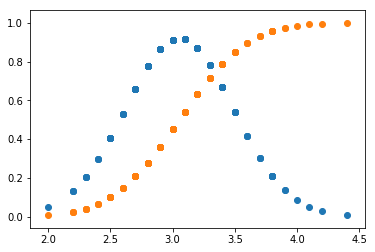

In [46]:
import scipy.stats as ss
data = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
data = data["SepalWidthCm"]
mu = 3.054000
sigma = 0.433594
y_pdf = ss.norm.pdf(data,mu,sigma) # Normal pdf
y_cdf = ss.norm.cdf(data,mu,sigma) # Normal cdf

plt.scatter(data, y_pdf, label='pdf')
plt.scatter(data, y_cdf, label='cdf')

Cdf with another variable

C:\Users\exoticana85\Anaconda32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.16666667, 0.42592593, 0.25925926, 0.5       , 0.2962963 ,
        0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

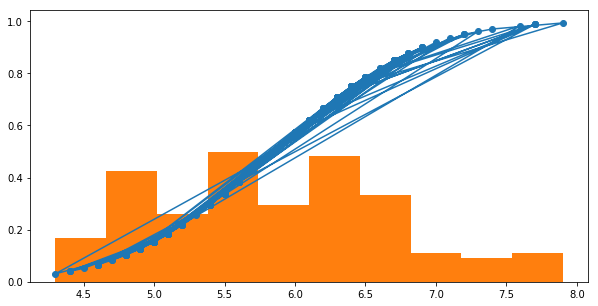

In [47]:
import scipy.stats as ss
plt.figure(figsize=(10,5))
data = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
data = data["SepalLengthCm"]
fit = stats.norm.cdf(data, np.mean(data), np.std(data))
plt.plot(data,fit,'-o')
plt.hist(data,normed=True)

Here we can see that cdf is more than pdf.

   # Normal distribution of SepalWidthCm
   
   The normal distribution is the most important and most widely used distribution in statistics. It is sometimes called the "bell curve," although the tonal qualities of such a bell would be less than pleasing.
   For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution.
   
   Parameters of the Normal Distribution

As with any probability distribution, the parameters for the normal distribution define its shape and probabilities entirely. The normal distribution has two parameters, the mean and standard deviation. 
   

C:\Users\exoticana85\Anaconda32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


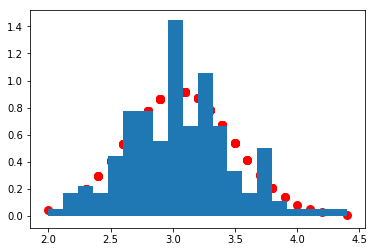

In [39]:
data = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
data = data["SepalWidthCm"]
count, bins, ignored = plt.hist(data, 20, normed=True)
mu = 3.054000
sigma = 0.433594

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((data - mu), 2) / (2 * np.power(sigma, 2)))))
plt.scatter(data, y, linewidths=3, color='red')

# Scatter plot of two variable.

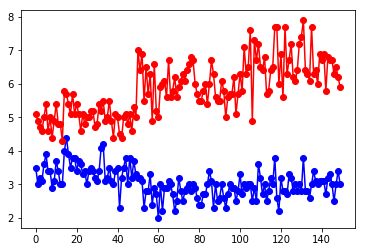

In [40]:
data = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
data1 = data["SepalWidthCm"]
data2 = data["SepalLengthCm"]
plt.plot(data1, marker='o', linestyle=None, color='b')
plt.plot(data2, marker='o', linestyle=None, color='r')
plt.show()

"Correlation does not imply causation” is a phrase used in statistics to emphasise that a correlation between two variables does not imply that one causes the other.

# Correlation Matrix

- A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.




In [41]:
data = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
data1 = data["SepalWidthCm"]
corr = df.corr()
corr.style.background_gradient()

,PetalWidthCm,Prob
PetalWidthCm,1,1
Prob,1,1


# Covariance, Pearson’s correlation

- Covariance provides a measure of the strength of the correlation between two or more sets of random variates. The covariance for two random variates X and Y, each with sample size N, is defined by the expectation value

cov(X,Y) = (X-mu_X)(Y-mu_Y)

- A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”.



In [42]:
np.cov(data1,data2)

array([[ 0.18800403, -0.03926846],
       [-0.03926846,  0.68569351]])

In [43]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data1, data2)
print("corr=", corr)
print("p_value=",p_value)

corr= -0.10936924995064935
p_value= 0.1827652152713665


# Hypothesis testing in python.

What is Hypothesis Testing?

A statistical hypothesis is an assumption about a population parameter. This assumption may or may not be true. Hypothesis testing refers to the formal procedures used by statisticians to accept or reject statistical hypotheses.
Statistical Hypotheses

The best way to determine whether a statistical hypothesis is true would be to examine the entire population. Since that is often impractical, researchers typically examine a random sample from the population. If sample data are not consistent with the statistical hypothesis, the hypothesis is rejected.

There are two types of statistical hypotheses.

- Null hypothesis :- The null hypothesis, denoted by Ho, is usually the hypothesis that sample observations result purely from chance.
- Alternative hypothesis :- The alternative hypothesis, denoted by H1 or Ha, is the hypothesis that sample observations are influenced by some non-random cause.


In [44]:
# By using t-test.
from scipy.stats import ttest_ind
stat, p = ttest_ind(data1, data2)
# Calculate the t-statistics
print("stat=", stat)
#p-value after comparison with the t 
print("p=",p)


stat= -36.548157693982006
p= 3.987838114848222e-112


# Classification analysis on data
## Iris data is classification so we will use Logistic Regression for prediction.


In [45]:
# Importing the libraries..
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the  dataset

dataset = pd.read_csv('/Users/exoticana85/Desktop/Data Exploration and Analysis-Python/Iris.csv')
del dataset['Id']
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# Fitting a logistic Regression to the training set.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result.
y_pred = classifier.predict(X_test)

# Making the confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_pred)
print("cm=",cm,"\nAccuracy=",Accuracy)


cm= [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 
Accuracy= 0.9666666666666667
